## Activitat 2: Massa màxima d’una estrella de neutrons
### En aquesta activitat, utilitzareu un model matemàtic per esbrinar les propietats físiques dels interiors de les estrelles de neutrons i predir la massa màxima d’una estrella de neutrons.

#### Les estrelles de neutrons són objectes astrofísics detectats mitjançant telescopis de ràdio i raigs X o mitjançant ones gravitacionals. Podeu pensar en una estrella de neutrons com un nucli molt gran.

#### Taula 1 a continuació es donen valors de la densitat central d'una estrella de neutrons en unitats de 10 ^ 17 kg m-3. Podeu utilitzar el valor que heu obtingut a l’activitat 3d aquí. A la segona fila es pot introduir un radi típic d’estrelles de neutrons de 10 km. No es permeten totes les combinacions de densitati radi i, en aquests casos, no veureu cap perfil.


##### Gràfica 5, a sota, mostra el perfil de pressió dins d’una estrella de neutrons, des del seu centre (r = 0, a l’esquerra) fins a la seva superfície (r = R, cap a la dreta). La pressió és més gran al centre i disminueix constantment amb r. La pressió de l'estrella s'esvaeix a la seva superfície.


##### Les dades utilitzades per crear la Gràfica 5 es mostren a Taula 5 al final de la pàgina. 

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

%matplotlib nbagg

<IPython.core.display.Javascript object>


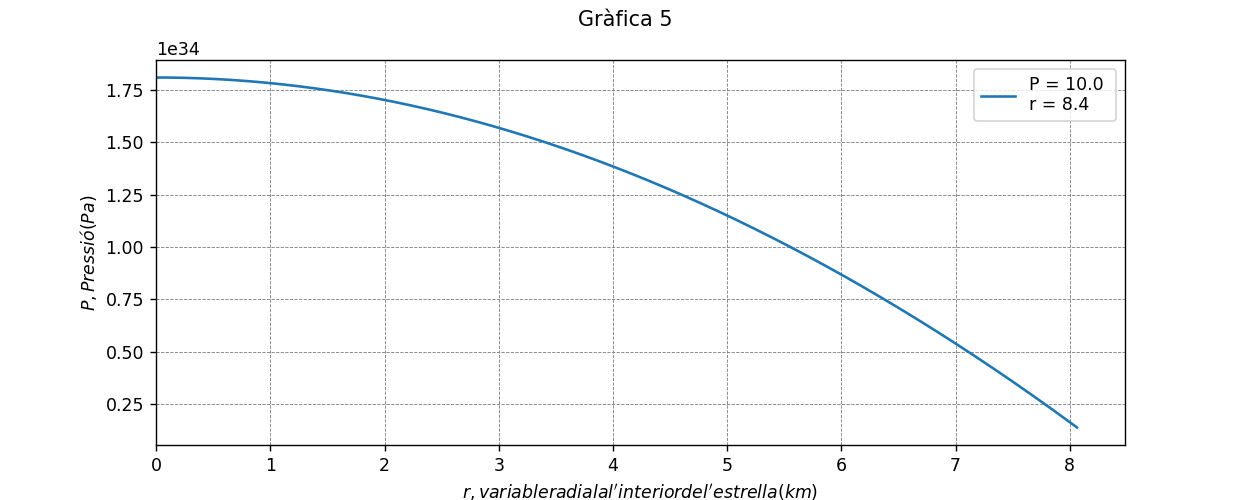

interactive(children=(BoundedFloatText(value=10.0, description='Densitat (en 10^17 kg m^-3):', max=20.0, min=0…

In [16]:
fig, ax = plt.subplots(1, figsize=(10,4))
plt.suptitle('Gràfica 5')

def values(densitat, radi):
    x = np.linspace(-0.04*radi, 0.96*radi, 1000)
    Comp = 8*np.pi/3*6674*pow(10,-14)*densitat*pow(10,17)*pow(radi*1000,2)/pow(299792458,2)
    if Comp < (8/9):
        Massa = densitat*pow(10,17)*4/3*np.pi*pow(radi*1000,3)/(1.989E+30)
        Ec = densitat*pow(10,17)*pow(299792458,2)
    else:
        Massa = 0
        Ec = 0
    if 1-Comp < 0:
        Arrel = 0
    else:
        Arrel = np.sqrt(1-Comp)
    return Massa, Comp, Ec, Arrel, x

def update_plot(densitat, radi):
    '''
    Funcio linkada al plot, dona pressio en funcio del radi
    x := Coordenada radial (en unitats de km)
    y := Perfil de pressió (en Pa)
    '''
    global Massa, Comp
    Massa, Comp, Ec, Arrel, x = values(densitat, radi)
    ax.clear()
    if any(1-Comp*pow(x,2)/radi**2) < 0 or any((1-Comp*pow(x,2)/radi**2)) == pow(3*Arrel,2) or Arrel == 0:
        y = np.linspace(0,0, 1000)
        print('Valors no compatibles amb el MGL')
    else:
        y = Ec * (np.sqrt(1-Comp*pow(x,2)/radi**2)-Arrel) / (3*Arrel-np.sqrt(1-Comp*pow(x,2)/radi**2))
    units = 'P = {} \nr = {}'
    ax.plot(x, y, label=units.format(densitat, radi))
    ax.legend(loc=1)
    ax.set_xlabel('$r, variable radial a l\'interior de l\'estrella (km)$')
    ax.set_ylabel('$P, Pressió (Pa)$')
    ax.set_xlim(0, )
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    return Massa

#densitat = widgets.FloatSlider(min=0, max=20, value=10, description='Densitat (en 10^17 kg m^-3)')
#radi = widgets.FloatSlider(min=0.01, max=20, value=10, description='Radi (en Km)')

densitat = widgets.BoundedFloatText(value=10, min=0.1, max=20, step=0.1, 
                                    description='Densitat (en 10^17 kg m^-3):', disabled=False)
radi = widgets.BoundedFloatText(value=10, min=0.1, max=20, step=0.1, 
                                description='Radi (en Km):', disabled=False)

widgets.interactive(update_plot, densitat=densitat, radi=radi)


##### En aquesta part del repte, utilitzarà els paràmetres del model de l’activitat 4 per predir les propietats a l’interior de les estrelles de neutrons.

##### Les tasques es mostren a continuació en cursiva. Les respostes a les preguntes amb una (Q) al costat es demanaran al Neutron Star Quiz (a la pàgina web principal).

#### Activitat4a
##### Quina és la massa i el radi típics d’una estrella de neutrons segons el model de densitat constant?
##### Introduïu els vostres valors per a la densitat i el radi a la taula 1 anterior. El full de càlcul calcularà immediatament la massa de l'estrella de neutrons en masses solars, si el model ho permet. Aquests valors es mostren a continuació.

In [17]:
def display_massa(densitat, radi):
    values(densitat,radi)
    print(Massa)
    
widgets.interactive(display_massa, densitat=densitat, radi=radi)

interactive(children=(BoundedFloatText(value=10.0, description='Densitat (en 10^17 kg m^-3):', max=20.0, min=0…

#### Activitat 4b
##### Proveu d'incrementar el radi 1 km a cada pas.
##### En algun moment, el càlcul ja no funciona. Heu superat la massa màxima permesa de l'estrella de neutrons.

#### Activitat 4c
##### (Q) Quina és la compacticitat d'una estrella de neutrons?
##### Calculeu la compacitat d’aquesta estrella de neutrons, C = 2 * G * M / Rc ^ 2. Aquest nombre adimensional quantificat us informa sobre la relevancia de l'efecte de relativitat general. Quan C és petit, es pot passar per alt la relativitat general. Quan C és massa gran, no trobareu un perfil de pressió.

In [18]:
def display_massa(densitat, radi):
    values(densitat,radi)
    print(Comp)
    
widgets.interactive(display_massa, densitat=densitat, radi=radi)

interactive(children=(BoundedFloatText(value=10.0, description='Densitat (en 10^17 kg m^-3):', max=20.0, min=0…

#### Activitat 4d
##### (Q) Mantenint la densitat fixa en 10 ^ 18 kg m-3, augmenteu el radi en increments petits i intenteu trobar el radi màxim permès per a aquest model. Anoteu la massa i la compacticitat que obtingueu. Ara canvieu la densitat a un altre valor de 5x10 ^ 18 kg m-3 i torneu a treballar amb diferents radis fins que trobeu la configuració inestable. Què podeu concloure dels valors que heu obtingut?

##### Ben fet en completar aquesta activitat. Ara torneu a la pàgina web per completar les preguntes de Modelant Estrelles de Neutrons

In [15]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')